<a href="https://colab.research.google.com/github/meronalemnew/Home-Automation/blob/master/M_coffee_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading and extracting the datataset from https://data.mendeley.com/datasets/c5yvn32dzg/

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/c5yvn32dzg-2.zip # Download the dataset
!unzip -qq c5yvn32dzg-2.zip -d ./data # Extract the downloaed file
!rm c5yvn32dzg-2.zip # remove the downloaded file

--2022-07-17 14:12:27--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/c5yvn32dzg-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.121.66
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.121.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2245450794 (2.1G) [application/octet-stream]
Saving to: ‘c5yvn32dzg-2.zip’

c5yvn32dzg-2.zip    100%[===================>]   2.09G  33.1MB/s    in 65s     

2022-07-17 14:13:33 (32.7 MB/s) - ‘c5yvn32dzg-2.zip’ saved [2245450794/2245450794]



In [ ]:
import numpy as np


In [ ]:
a = np.array([1, 2, 3])
b = np.array([5, 0, 1])

In [ ]:
a

array([1, 2, 3])

In [ ]:
b

array([5, 0, 1])

In [ ]:
a + b

array([6, 2, 4])

In [ ]:
a* b

array([5, 0, 3])

In [ ]:
np.linalg.norm(a)

3.7416573867739413

### Importing required packages

In [ ]:
import numpy as np
import pandas as pd
import json
import os
from sklearn.model_selection import train_test_split # The method that can be used to split the data to train and test sets.
import random
import torch
import shutil
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torch import nn
import time
import copy
import PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
RANDOM_SEED = 1234 # This can be used to get reproducible results

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device.type=="cuda"

True

## Set the seed of the random generator to get reproducible results

In [ ]:
np.random.seed(42)
np.random.randn(10)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [ ]:
np.random.seed(42)
np.random.randn(10)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [ ]:
def set_random_seed(seed_value, use_cuda):
  random.seed(seed_value)
  np.random.seed(seed_value)
  torch.manual_seed(seed_value)
  os.environ['PYTHONHASHSEED'] = str(seed_value)
  if use_cuda:
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value) 
  
set_random_seed(RANDOM_SEED, device.type=="cuda")



```
# This is formatted as code
```

## Loading the dataset

In [ ]:
data_path = "./data"

In [ ]:
dataset = pd.read_excel(os.path.join(data_path, "Annotations", "RoCoLe-classes.xlsx"))

In [ ]:
dataset.head(7)

,File,Binary.Label,Multiclass.Label
0,C1P1H1.jpg,healthy,healthy
1,C1P2E2.jpg,unhealthy,rust_level_2
2,C1P2H1.jpg,healthy,healthy
3,C1P3E1.jpg,healthy,healthy
4,C1P3E2.jpg,unhealthy,rust_level_2
5,C1P3H1.jpg,healthy,healthy
6,C1P3H2.jpg,unhealthy,rust_level_3


In [ ]:
dataset["Multiclass.Label"].unique()

array(['healthy', 'rust_level_2', 'rust_level_3', 'rust_level_1',
       'red_spider_mite', 'rust_level_4'], dtype=object)

In [ ]:
train_set, valid_set = train_test_split(dataset, test_size=0.2, random_state=RANDOM_SEED, stratify=dataset["Binary.Label"])

In [ ]:
train_set.head()

,File,Binary.Label,Multiclass.Label
262,C3P27H1.jpg,healthy,healthy
1149,C9P31H1.jpg,unhealthy,rust_level_4
571,C5P11E2.jpg,healthy,healthy
773,C5P29E2.jpg,unhealthy,rust_level_1
841,C7P18H2.jpg,healthy,healthy


In [ ]:
train_set = train_set.reset_index(drop=True)
valid_set = valid_set.reset_index(drop=True)

In [ ]:
type(train_set)

pandas.core.frame.DataFrame

In [ ]:
train_set.head(3)

,File,Binary.Label,Multiclass.Label
0,C3P27H1.jpg,healthy,healthy
1,C9P31H1.jpg,unhealthy,rust_level_4
2,C5P11E2.jpg,healthy,healthy


In [ ]:
train_set.shape

(1248, 3)

In [ ]:
row1 = valid_set.iloc[0]
row1

File                 C3P12E2.jpg
Binary.Label           unhealthy
Multiclass.Label    rust_level_2
Name: 0, dtype: object

In [ ]:
image_path = os.path.join("/content/data/Photos", row1["File"])
print(image_path)

/content/data/Photos/C3P12E2.jpg


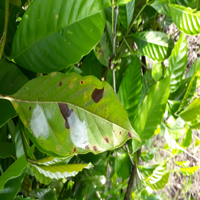

In [ ]:
image = PIL.Image.open(image_path)
image = image.resize((200, 200))
image

In [ ]:
a = [1, 2, 4]
print(a[1])

2


In [ ]:
class TestClass:
  def __getitem__(self, i):
    print("Get itme called: i={}".format(i))

In [ ]:
c = TestClass()
c[3]

Get itme called: i=3


## Creating pytorch dataset class for each set

In [ ]:
class CoffeeImageDataset(Dataset):
  def __init__(self,df, data_path, transform = None):
    self.data_path = data_path
    self.transform = transform
    self.label2class = {
        "healthy":0.0,
        "unhealthy":1.0
    }
    self.df = df
  def __len__(self):
    return self.df.shape[0] # number of rows of the dataframe
  def __getitem__(self, indx):
    filename, label  = self.df.loc[indx, ["File", "Binary.Label"]]
    
    image = PIL.Image.open(os.path.join(self.data_path, "Photos", filename))
    if self.transform is not None:
      image = self.transform(image)
    class_ = self.label2class[label]
    return image, class_
    

In [ ]:
a = [3, 2, 5]
print(a[0])

3


In [ ]:
input_size = 224
batch_size = 32

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
train_dataset = CoffeeImageDataset(train_set, data_path, data_transforms["train"])
valid_dataset = CoffeeImageDataset(valid_set, data_path, data_transforms["valid"])

In [ ]:
image, label = train_dataset[423]

In [ ]:
image.shape

torch.Size([3, 224, 224])

In [ ]:
label

1.0

In [ ]:
image = image.permute(1, 2, 0)

print(image.shape)

torch.Size([224, 224, 3])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
label

1.0

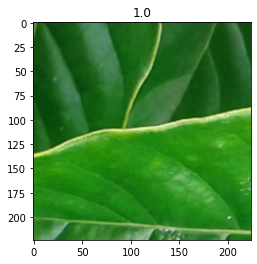

In [ ]:
img = image - image.min()
img = ((img/img.max()) * 255).numpy().astype(np.uint8)
plt.title(str(label))
plt.imshow(img)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4); # pre loades images into RAM from harddisk.
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4);

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




```
`# This is formatted as code`
```

## Creating a model using the resnet model as base model

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting: # This is true when we don't want to train the base model
        for param in model.parameters():
            param.requires_grad = False # Freeze model's layers.

In [ ]:
# y = W (X) + b

In [ ]:
relu = nn.ReLU()


In [ ]:
a  = torch.tensor([-1, 1, 2, -4])
relu(a)

tensor([0, 1, 2, 0])

In [ ]:
def get_resnet_model(use_pretrained=True, feature_extract=True):
  base_model = models.resnext101_32x8d(pretrained=use_pretrained)
  set_parameter_requires_grad(base_model, feature_extract)
  num_ftrs = base_model.fc.in_features
  base_model.fc = nn.Sequential(nn.Linear(num_ftrs, 128), 
                              nn.ReLU(), 
                          
                            
                              nn.Linear(128, 1) , 
                              nn.Sigmoid())
  return base_model

In [ ]:
# y = f(x) = Wx + b




## Seriel Neural networks
$$
y = mx + b\\
y_1 = \sigma(W_1x + b_1)\\
y_2 = \sigma(W_2y_1 + b_2)
$$
## Residual Neural networks
$$
y = mx + b\\
y_1 = \sigma(W_1x + b_1)\\
y_2 = \sigma(W_2y_1 + b_2 + x)
$$

In [ ]:
model = get_resnet_model()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
image, label = train_dataset[0]
print(image.shape)
print(label)

torch.Size([3, 224, 224])
0.0


In [ ]:
itr = iter(train_loader)
image_batch, label_batch = next(itr)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
print(image_batch.shape)
print(label_batch.shape)


torch.Size([32, 3, 224, 224])
torch.Size([32])


In [ ]:
device.type

'cuda'

In [ ]:
model = model.to(device)

In [ ]:
criterion = nn.BCELoss() # Binary cross entropy loss(cost function)
optimizer = torch.optim.Adam(model.fc.parameters(), lr = 1e-5) # Optimizer Adam

**bold text**## Training the model

### Optimization Step

$$
W_{new} = W_{old} - \Delta_w{Loss}\\
b_{new} = b_{old} - \Delta_b{Loss}
$$

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=50):
    
    
    since = time.time()

    train_losses = []
    train_accs = []
    val_accs = []
    val_losses = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)


        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                
                inputs = inputs.to(device)
                labels = labels.to(device).float().view(-1, 1)

                # zero the parameter gradients
                optimizer.zero_grad()
                

                with torch.set_grad_enabled(phase == 'train'):

                    outputs = model(inputs) # y = f(x)
                    loss = criterion(outputs, labels) # Binary crossentropy

                    preds = torch.round(outputs) # [0.9] = 1.0, 0.4==0.0

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward() # compute gradient of loss with respect to each parameters
                        optimizer.step() # update the parameters using the gradient computed

                # statistics
                running_loss += loss.item() * inputs.size(0) # [1, 2, 3]=> (1 + 2 + 3)/3 = 2 
                # (1 + 2 + 3) = 2 * 3

                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'valid':
                val_accs.append(epoch_acc)
                val_losses.append(epoch_loss)
            else:
              train_losses.append(epoch_loss)
              train_accs.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, {"train_loss": train_losses, "val_losses": val_losses, "train_acc": train_accs, "val_acc": val_accs}

In [ ]:
dataloaders = {"train":train_loader, "valid":valid_loader}

In [ ]:
model, history = train_model(model, dataloaders, criterion , optimizer, num_epochs=30)

In [ ]:
history["train_acc"] = [t.item() for t in history["train_acc"]]
history["val_acc"] = [t.item() for t in history["val_acc"]]

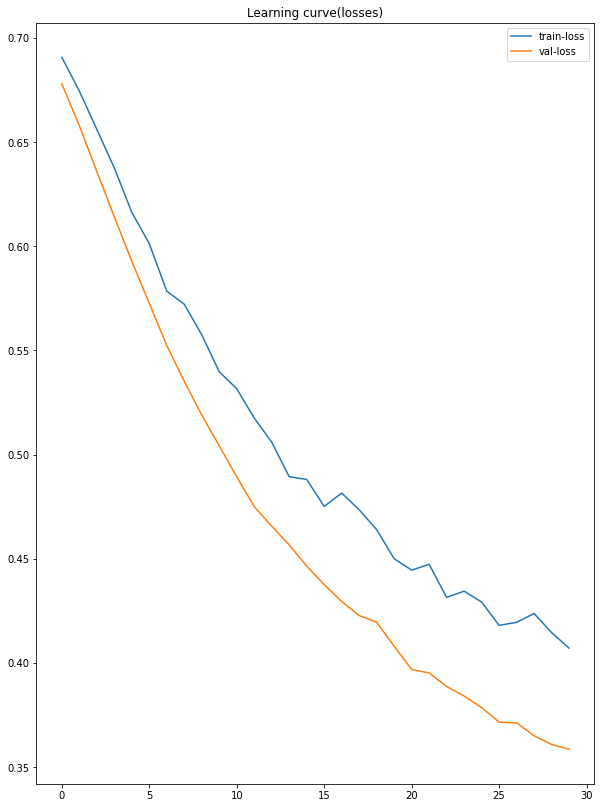

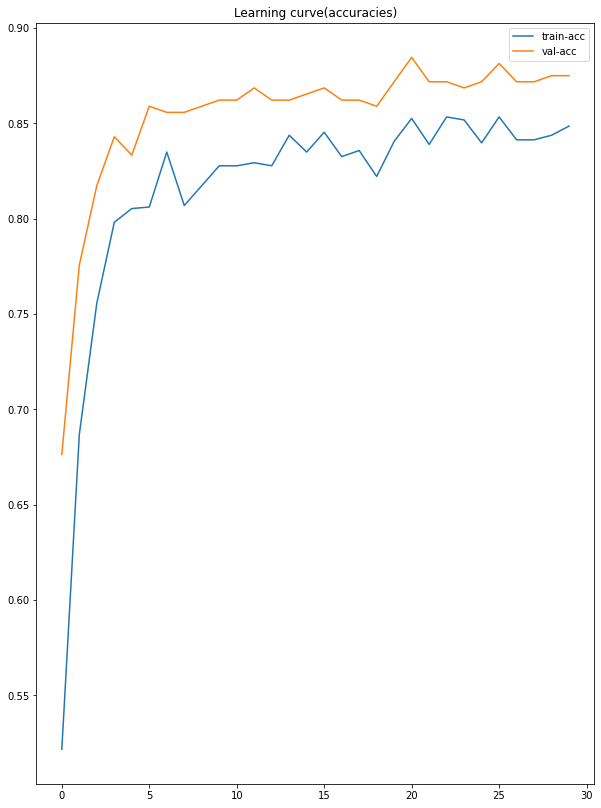

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 14))
plt.plot(history["train_loss"], label="train-loss")
plt.plot(history["val_losses"], label="val-loss")
plt.title("Learning curve(losses)")
plt.legend()
fig = plt.figure(figsize=(10, 14))
plt.plot(history["train_acc"], label="train-acc")
plt.plot(history["val_acc"], label="val-acc")
plt.title("Learning curve(accuracies)")
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), "model-weights.pkt")


In [ ]:
torch.save(model, "model.pkt")

## Testing our model

pred tensor([[0.5007]], grad_fn=<SigmoidBackward0>)


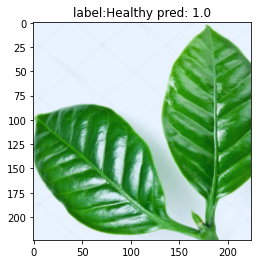

In [ ]:

# index = 132
# image, label = valid_dataset[index]
import requests
from io import BytesIO
import matplotlib.pyplot as plt
url = "https://www.comunicaffe.com/wp-content/uploads/2016/02/Coffee-Rust.jpg"
response = requests.get(url)
image = PIL.Image.open(BytesIO(response.content)).convert("RGB")

image = data_transforms["train"](image)

pred = model(torch.unsqueeze(image, dim=0))
print("pred", pred)
pred = torch.round(pred).item()
img = image - image.min()
img = img.permute(1, 2, 0)
img = ((img/img.max()) * 255).numpy().astype(np.uint8)
plt.title("label:{} pred: {}".format("Healthy", pred))
plt.imshow(img)


In [ ]:
labels = [train_dataset[i][1] for i in range(len(train_dataset))]

In [ ]:
from collections import Counter

In [ ]:
counts = Counter(labels)

In [ ]:
counts

Counter({0.0: 633, 1.0: 615})

## Link to Torch Serve https://pytorch.org/serve/server.html

## Link to tensor space https://tensorspace.org/html/playground/lenet.html

In [ ]:
from google.colab import files
files.download('model.pkt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!mv

mv: missing file operand
Try 'mv --help' for more information.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp model.pkt /content/drive/MyDrive/model.pkt

In [ ]:
history["train_acc"][0]

